#LIAR

In [ ]:
d_feat = {
    'paragraphs': 'Paragraphs',
    'total_sentences': 'Total Sentences',
    'mean_sentences': 'Mean Sentences',
    'std_sentences': 'Std Sentences',
    'min_sentences': 'Min Sentences',
    'max_sentences': 'Max Sentences',
    'total_words': 'Total Words',
    'mean_words': 'Mean Words',
    'std_words': 'Std Words',
    'min_words': 'Min Words',
    'max_words': 'Max Words',
    'total_char': 'Total Char',
    'mean_char': 'Mean Char',
    'std_char': 'Std Char',
    'min_char': 'Min Char',
    'max_char': 'Max Char',
    'total_char_nospace': 'Total Char NoSpace',
    'mean_char_nospace': 'Mean Char NoSpace',
    'std_char_nospace': 'Std Char NoSpace',
    'min_char_nospace': 'Min Char NoSpace',
    'max_char_nospace': 'Max Char NoSpace'
}

In [2]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import spacy
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

df_LIAR_train = pd.read_csv('output_LIAR_train_statistics.csv', delimiter =";")
df_LIAR_test =  pd.read_csv('output_LIAR_test_statistics.csv', delimiter =";")

C:\Users\pablo.ormeno\AppData\Local\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
df_LIAR_test.columns

Index(['id', 'label', 'paragraphs', 'total_sentences', 'mean_sentences',
       'std_sentences', 'min_sentences', 'max_sentences', 'total_words',
       'mean_words', 'std_words', 'min_words', 'max_words', 'total_char',
       'mean_char', 'std_char', 'min_char', 'max_char', 'total_char_nospace',
       'mean_char_nospace', 'std_char_nospace', 'min_char_nospace',
       'max_char_nospace', 'texto'],
      dtype='object')

In [4]:
y_train = df_LIAR_train['label']
y_test = df_LIAR_test['label']
y_test= y_test.fillna('True')


In [5]:
from collections import Counter
Counter(y_train) 

Counter({'True': 1676,
         'barely-true': 1654,
         'half-true': 2114,
         'False': 1995,
         'mostly-true': 1962,
         'pants-fire': 839})

In [6]:
Counter(y_test)

Counter({'half-true': 265,
         'barely-true': 212,
         'mostly-true': 241,
         'True': 224,
         'False': 249,
         'pants-fire': 92})

In [7]:
y_train = y_train.replace("barely-true","TRUE")
y_train = y_train.replace("True","TRUE")
y_train = y_train.replace("half-true","TRUE")
y_train = y_train.replace("mostly-true","TRUE")
y_train = y_train.replace("False","FALSE")
y_train = y_train.replace("pants-fire","PANTSFIRE")
y_test = y_test.replace("barely-true","TRUE")
y_test = y_test.replace("True","TRUE")
y_test = y_test.replace("half-true","TRUE")
y_test = y_test.replace("mostly-true","TRUE")
y_test = y_test.replace("False","FALSE")
y_test = y_test.replace("pants-fire","PANTSFIRE")

from collections import Counter
Counter(y_train) 


Counter({'TRUE': 7406, 'FALSE': 1995, 'PANTSFIRE': 839})

In [8]:
Counter(y_test)

Counter({'TRUE': 942, 'FALSE': 249, 'PANTSFIRE': 92})

In [9]:
X_train = df_LIAR_train.iloc[:,2:23]
X_test = df_LIAR_test.iloc[:,2:23] 
X_test

,paragraphs,total_sentences,mean_sentences,std_sentences,min_sentences,max_sentences,total_words,mean_words,std_words,min_words,...,total_char,mean_char,std_char,min_char,max_char,total_char_nospace,mean_char_nospace,std_char_nospace,min_char_nospace,max_char_nospace
0,1,1,1.0,0.0,1,1,4,4.0,0.0,4,...,30,30.0,0.0,30,30,27,27.0,0.0,27,27
1,1,1,1.0,0.0,1,1,10,10.0,0.0,10,...,69,69.0,0.0,69,69,60,60.0,0.0,60,60
2,1,1,1.0,0.0,1,1,19,19.0,0.0,19,...,106,106.0,0.0,106,106,89,89.0,0.0,89,89
3,1,1,1.0,0.0,1,1,7,7.0,0.0,7,...,42,42.0,0.0,42,42,36,36.0,0.0,36,36
4,1,1,1.0,0.0,1,1,14,14.0,0.0,14,...,64,64.0,0.0,64,64,51,51.0,0.0,51,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1278,1,1,1.0,0.0,1,1,18,18.0,0.0,18,...,112,112.0,0.0,112,112,96,96.0,0.0,96,96
1279,1,1,1.0,0.0,1,1,10,10.0,0.0,10,...,59,59.0,0.0,59,59,50,50.0,0.0,50,50
1280,1,1,1.0,0.0,1,1,26,26.0,0.0,26,...,155,155.0,0.0,155,155,130,130.0,0.0,130,130
1281,1,1,1.0,0.0,1,1,11,11.0,0.0,11,...,74,74.0,0.0,74,74,64,64.0,0.0,64,64


In [10]:
X_test.columns
lista_columnas = list(X_test.columns)
lista_columnas

['paragraphs',
 'total_sentences',
 'mean_sentences',
 'std_sentences',
 'min_sentences',
 'max_sentences',
 'total_words',
 'mean_words',
 'std_words',
 'min_words',
 'max_words',
 'total_char',
 'mean_char',
 'std_char',
 'min_char',
 'max_char',
 'total_char_nospace',
 'mean_char_nospace',
 'std_char_nospace',
 'min_char_nospace',
 'max_char_nospace']

In [11]:
from sklearn.preprocessing import StandardScaler
#X_statistics_scaled_features = StandardScaler().fit_transform(X_statistics.values)
#X_statistics_scaled_features
X_voc_statistics_scaled_features_TRAIN = StandardScaler().fit_transform(X_train)

X_voc_statistics_scaled_features_TEST = StandardScaler().fit_transform(X_test)
X_voc_statistics_scaled_features_TEST

array([[-0.03699365, -0.18415055, -0.26441904, ..., -0.27244614,
        -1.43013669, -1.68975453],
       [-0.03699365, -0.18415055, -0.26441904, ..., -0.27244614,
        -0.54329987, -0.73176689],
       [-0.03699365, -0.18415055, -0.26441904, ..., -0.27244614,
         0.23604157,  0.11010104],
       ...,
       [-0.03699365, -0.18415055, -0.26441904, ..., -0.27244614,
         1.33786913,  1.30032811],
       [-0.03699365, -0.18415055, -0.26441904, ..., -0.27244614,
        -0.4358045 , -0.61564717],
       [-0.03699365, -0.18415055, -0.26441904, ..., -0.27244614,
         0.96163533,  0.89390911]])

In [ ]:
from matplotlib import pyplot as plt
from sklearn import svm

def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

svm = svm.SVC(kernel='linear')
svm.fit(X_train, y_train)
f_importances(svm.coef_, lista_columnas)

In [12]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
# Train a machine learning model
from sklearn.ensemble import AdaBoostClassifier
clf_ADA = AdaBoostClassifier(n_estimators=100).fit(X_train, y_train)
y_pred = clf_ADA.predict(X_test)    


# Classification Report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

       FALSE       0.00      0.50      0.01         2
   PANTSFIRE       0.00      0.00      0.00         2
        TRUE       1.00      0.73      0.85      1279

    accuracy                           0.73      1283
   macro avg       0.33      0.41      0.28      1283
weighted avg       0.99      0.73      0.84      1283



[[0.11, 11, 'total_char'], [0.1, 8, 'std_words'], [0.09, 16, 'total_char_nospace'], [0.09, 13, 'std_char'], [0.09, 6, 'total_words'], [0.08, 17, 'mean_char_nospace'], [0.08, 14, 'min_char'], [0.06, 20, 'max_char_nospace'], [0.06, 7, 'mean_words'], [0.05, 15, 'max_char'], [0.05, 9, 'min_words'], [0.04, 12, 'mean_char'], [0.03, 19, 'min_char_nospace'], [0.03, 18, 'std_char_nospace'], [0.02, 1, 'total_sentences'], [0.01, 4, 'min_sentences'], [0.01, 2, 'mean_sentences'], [0.0, 10, 'max_words'], [0.0, 5, 'max_sentences'], [0.0, 3, 'std_sentences'], [0.0, 0, 'paragraphs']]
[0.11, 0.1, 0.09, 0.09, 0.09, 0.08, 0.08, 0.06, 0.06, 0.05, 0.05, 0.04, 0.03, 0.03, 0.02, 0.01, 0.01, 0.0, 0.0, 0.0, 0.0]
[0.11, 0.1, 0.09, 0.09, 0.09, 0.08, 0.08, 0.06, 0.06, 0.05]
['total_char', 'std_words', 'total_char_nospace', 'std_char', 'total_words', 'mean_char_nospace', 'min_char', 'max_char_nospace', 'mean_words', 'max_char', 'min_words', 'mean_char', 'min_char_nospace', 'std_char_nospace', 'total_sentences', 'mi

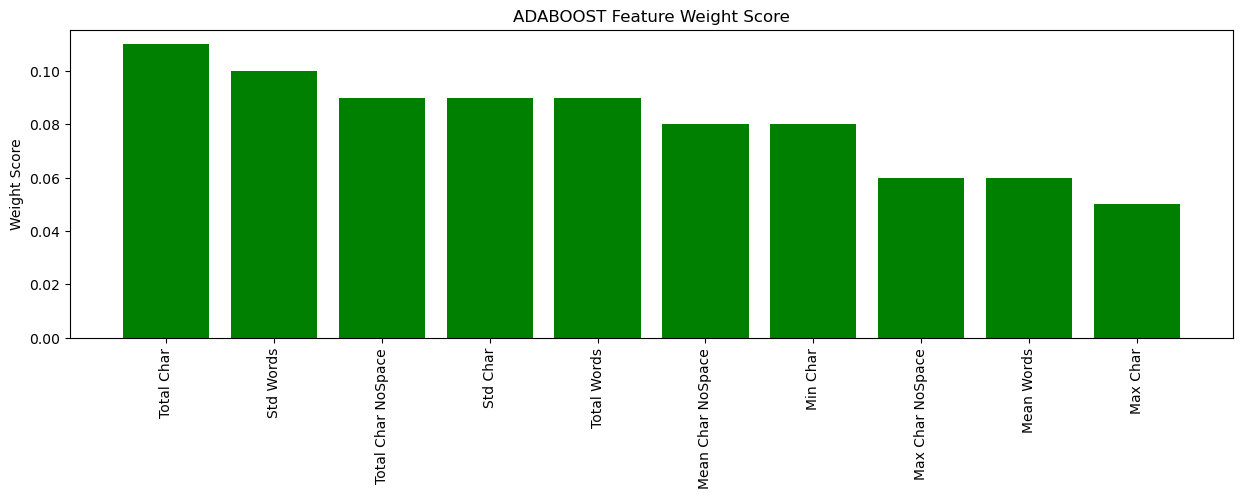

In [14]:
c = 0
l = []
for x, col in zip(clf_ADA.feature_importances_, lista_columnas):
    l.append([x,c,col])
    c+=1
l.sort()
l.reverse()
print(l)
l_values_imp = []
l_col_imp = []
for col_Im in l:
    l_values_imp.append(col_Im[0])
    l_col_imp.append(col_Im[2])
print(l_values_imp)
l_values_imp = l_values_imp[:10]
print(l_values_imp)  
print(l_col_imp)
l_col_imp = l_col_imp[:10]
print(l_col_imp)

l_col_feat_meaning = []
for l in l_col_imp:
    l_col_feat_meaning.append(d_feat[l])
    
for f, n in zip(l_col_feat_meaning,l_values_imp):
    print(f,n)
        

plt.figure(figsize=(15,4))
plt.bar(x=l_col_feat_meaning, height=l_values_imp, color='green')
plt.xticks(rotation='vertical')

plt.ylabel('Weight Score')
plt.title('ADABOOST Feature Weight Score')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
# Train a machine learning model
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Classification Report
print(classification_report(y_pred, y_test))

In [ ]:

c = 0
l = []
for x, col in zip(clf.feature_importances_, lista_columnas):
    l.append([x,c,col])
    c+=1
l.sort()
l.reverse()
print(l)
l_values_imp = []
l_col_imp = []
for col_Im in l:
    l_values_imp.append(col_Im[0])
    l_col_imp.append(col_Im[2])
print(l_values_imp)
l_values_imp = l_values_imp[:10]
print(l_values_imp)  
print(l_col_imp)
l_col_imp = l_col_imp[:10]
print(l_col_imp)  

plt.figure(figsize=(15,4))
plt.bar(x=l_col_imp, height=l_values_imp, color='green')
plt.xticks(rotation='vertical')

plt.ylabel('Weight Score')
plt.title('RANDOM FOREST Feature Weight Score')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
from sklearn import svm, datasets
from sklearn.ensemble import AdaBoostClassifier
from imblearn.ensemble import BalancedBaggingClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from collections import Counter

#X_train, X_test, y_train, y_test = model_selection.train_test_split(X_voc_statistics_scaled_features, y, train_size=0.80, test_size=0.20)
X_train  = X_voc_statistics_scaled_features_TRAIN
X_test = X_voc_statistics_scaled_features_TEST
y_train = y_train
y_test = y_test

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
xg_reg = xgb.XGBClassifier().fit(X_train, y_train)
y_pred = xg_reg.predict(X_test)
print(classification_report(y_pred, y_test))

In [ ]:
xgb.plot_importance(xg_reg,max_num_features=30,importance_type = "gain")

In [ ]:
c = 0
l = []
for x, col in zip(xg_reg.feature_importances_, lista_columnas):
    l.append([x,c,col])
    c+=1
l.sort()
l.reverse()
print(l)
l_values_imp = []
l_col_imp = []
for col_Im in l:
    l_values_imp.append(col_Im[0])
    l_col_imp.append(col_Im[2])
print(l_values_imp)
l_values_imp = l_values_imp[:10]
print(l_values_imp)  
print(l_col_imp)
l_col_imp = l_col_imp[:10]
print(l_col_imp)  

plt.figure(figsize=(15,4))
plt.bar(x=l_col_imp, height=l_values_imp, color='green')
plt.xticks(rotation='vertical')

plt.ylabel('Weight Score')
plt.title('XGBOOST Feature Weight Score')
plt.show()

In [ ]:
df_LIAR_train = pd.read_csv('output_LIAR_train_statistics.csv', delimiter =";")
df_LIAR_test =  pd.read_csv('output_LIAR_test_statistics.csv', delimiter =";")

X_train_INTERPRETABLE = df_LIAR_train.iloc[:,2:23]
X_test_INTERPRETABLE = df_LIAR_test.iloc[:,2:23] 
y_train = df_LIAR_train['label']
y_test = df_LIAR_test['label']
y_test= y_test.fillna('True')

In [ ]:
y_train = y_train.replace("barely-true","TRUE")
y_train = y_train.replace("True","TRUE")
y_train = y_train.replace("half-true","TRUE")
y_train = y_train.replace("mostly-true","TRUE")
y_train = y_train.replace("False","FALSE")
y_train = y_train.replace("pants-fire","PANTSFIRE")
y_test = y_test.replace("barely-true","TRUE")
y_test = y_test.replace("True","TRUE")
y_test = y_test.replace("half-true","TRUE")
y_test = y_test.replace("mostly-true","TRUE")
y_test = y_test.replace("False","FALSE")
y_test = y_test.replace("pants-fire","PANTSFIRE")

In [ ]:
X_train_INTERPRETABLE = X_train_INTERPRETABLE.filter(l_col_imp)
X_train_INTERPRETABLE

In [ ]:
X_test_INTERPRETABLE = X_test_INTERPRETABLE.filter(l_col_imp)
X_test_INTERPRETABLE

In [ ]:
from sklearn.preprocessing import StandardScaler
X_voc_features_TRAIN_INTER = StandardScaler().fit_transform(X_train_INTERPRETABLE)
X_voc_features_TEST_INTER = StandardScaler().fit_transform(X_test_INTERPRETABLE)
y_train

In [ ]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
# Train a machine learning model
from sklearn.ensemble import AdaBoostClassifier
clf_ADA = AdaBoostClassifier(n_estimators=100).fit(X_train_INTERPRETABLE, y_train)
y_pred = clf_ADA.predict(X_test_INTERPRETABLE)    


# Classification Report
print(classification_report(y_pred, y_test))

report = classification_report(y_test, y_pred, output_dict=True)
print(report)
print("IMBALANBCED")
print("ADA"," & ",
       round(report['accuracy'],3)," & ",
       round(report['weighted avg']['precision'],3)," & ",
       round(report['weighted avg']['recall'],3)," & ",
       round(report['weighted avg']['f1-score'],3)," \\\\* ",
     
     )


from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(y_test, y_pred, labels=["False","True","barely-true","half-true","pants-fire"])



from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#cm = confusion_matrix(y_test, y_pred, labels=["False","True","barely-true","half-true","pants-fire"])
cm = confusion_matrix(y_test, y_pred, labels=["FALSE","PANTSFIRE","TRUE"])
print(cm)
#disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["False","True","barely-true","half-true","pants-fire"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["FALSE","PANTSFIRE","TRUE"])
disp.plot(cmap="Reds", xticks_rotation="vertical")
disp.ax_.set(xlabel='Predicted', ylabel='True')

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
samp = "RUS"
if samp == "SMOTE": 
    sample = SMOTE()
if samp == "ROS": 
    sample = RandomOverSampler()
if samp == "RUS": 
    sample = RandomUnderSampler()
    
X_sampled, y_sampled = sample.fit_resample(X_train_INTERPRETABLE, y_train)

instance_counts_labels = Counter(y_sampled)
print("Instance counts y sampled:", instance_counts_labels)


clf_ADA = AdaBoostClassifier(n_estimators=100).fit(X_sampled, y_sampled)
y_pred = clf_ADA.predict(X_test_INTERPRETABLE) 

# Classification Report
print(classification_report(y_pred, y_test))

report = classification_report(y_test, y_pred, output_dict=True)
print(report)
print("IMBALANBCED")
print("ADA"," & ",
       round(report['accuracy'],3)," & ",
       round(report['weighted avg']['precision'],3)," & ",
       round(report['weighted avg']['recall'],3)," & ",
       round(report['weighted avg']['f1-score'],3)," \\\\* ",
     
     )


from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(y_test, y_pred, labels=["False","True","barely-true","half-true","pants-fire"])



from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#cm = confusion_matrix(y_test, y_pred, labels=["False","True","barely-true","half-true","pants-fire"])
cm = confusion_matrix(y_test, y_pred, labels=["FALSE","PANTSFIRE","TRUE"])
print(cm)
#disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["False","True","barely-true","half-true","pants-fire"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["FALSE","PANTSFIRE","TRUE"])
disp.plot(cmap="Reds", xticks_rotation="vertical")
disp.ax_.set(xlabel='Predicted', ylabel='True')

In [ ]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
# Train a machine learning model
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train_INTERPRETABLE, y_train)
y_pred = clf.predict(X_test_INTERPRETABLE)

# Classification Report
print(classification_report(y_pred, y_test))

report = classification_report(y_test, y_pred, output_dict=True)
print(report)
print("IMBALANBCED")
print("RF"," & ",
       round(report['accuracy'],3)," & ",
       round(report['weighted avg']['precision'],3)," & ",
       round(report['weighted avg']['recall'],3)," & ",
       round(report['weighted avg']['f1-score'],3)," \\\\* ",
     
     )


from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(y_test, y_pred, labels=["False","True","barely-true","half-true","pants-fire"])

["FALSE","PANTSFIRE","TRUE"]

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#cm = confusion_matrix(y_test, y_pred, labels=["False","True","barely-true","half-true","pants-fire"])
cm = confusion_matrix(y_test, y_pred, labels=["FALSE","PANTSFIRE","TRUE"])
print(cm)
#disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["False","True","barely-true","half-true","pants-fire"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["FALSE","PANTSFIRE","TRUE"])
disp.plot(cmap="Reds", xticks_rotation="vertical")
disp.ax_.set(xlabel='Predicted', ylabel='True')

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
samp = "RUS"
if samp == "SMOTE": 
    sample = SMOTE()
if samp == "ROS": 
    sample = RandomOverSampler()
if samp == "RUS": 
    sample = RandomUnderSampler()
    
X_sampled, y_sampled = sample.fit_resample(X_train_INTERPRETABLE, y_train)

instance_counts_labels = Counter(y_sampled)
print("Instance counts y sampled:", instance_counts_labels)

clf = RandomForestClassifier()
clf.fit(X_sampled, y_sampled)
y_pred = clf.predict(X_test_INTERPRETABLE)

# Classification Report
print(classification_report(y_pred, y_test))

report = classification_report(y_test, y_pred, output_dict=True)
print(report)
print("IMBALANBCED")
print("RF"," & ",
       round(report['accuracy'],3)," & ",
       round(report['weighted avg']['precision'],3)," & ",
       round(report['weighted avg']['recall'],3)," & ",
       round(report['weighted avg']['f1-score'],3)," \\\\* ",
     
     )


from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(y_test, y_pred, labels=["False","True","barely-true","half-true","pants-fire"])



from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#cm = confusion_matrix(y_test, y_pred, labels=["False","True","barely-true","half-true","pants-fire"])
cm = confusion_matrix(y_test, y_pred, labels=["FALSE","PANTSFIRE","TRUE"])
print(cm)
#disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["False","True","barely-true","half-true","pants-fire"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["FALSE","PANTSFIRE","TRUE"])
disp.plot(cmap="Reds", xticks_rotation="vertical")
disp.ax_.set(xlabel='Predicted', ylabel='True')

In [ ]:
y_train

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
xg_reg = xgb.XGBClassifier().fit(X_train_INTERPRETABLE, y_train)
y_pred = xg_reg.predict(X_test_INTERPRETABLE)



instance_counts_labels = Counter(y_pred)
print("Instance counts y sampled:", instance_counts_labels)
print(len(y_pred))
instance_counts_labels = Counter(y_test)
print("Instance counts y sampled:", instance_counts_labels)
print(len(y_test))



y_pred_LABEL = le.inverse_transform(y_pred)
y_test_LABEL = le.inverse_transform(y_test)

instance_counts_labels = Counter(y_pred_LABEL)
print("Instance counts y sampled:", instance_counts_labels)
print(len(y_pred_LABEL))
instance_counts_labels = Counter(y_test_LABEL)
print("Instance counts y sampled:", instance_counts_labels)
print(len(y_test_LABEL))


print(classification_report(y_pred_LABEL, y_test_LABEL))

report = classification_report(y_test_LABEL, y_pred_LABEL, output_dict=True)
print(report)
print("IMBALANBCED")
print("XGBOOST"," & ",
       round(report['accuracy'],3)," & ",
       round(report['weighted avg']['precision'],3)," & ",
       round(report['weighted avg']['recall'],3)," & ",
       round(report['weighted avg']['f1-score'],3)," \\\\* ",
     
     )


from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(y_test_LABEL, y_pred_LABEL, labels=["False","True","barely-true","half-true","pants-fire"])



from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#cm = confusion_matrix(y_test_LABEL, y_pred_LABEL, labels=["False","True","barely-true","half-true","pants-fire"])
cm = confusion_matrix(y_test_LABEL, y_pred_LABEL, labels=["FALSE","PANTSFIRE","TRUE"])
print(cm)
#disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["False","True","barely-true","half-true","pants-fire"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["FALSE","PANTSFIRE","TRUE"])
disp.plot(cmap="Reds", xticks_rotation="vertical")
disp.ax_.set(xlabel='Predicted', ylabel='True')

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
samp = "ROS"
if samp == "SMOTE": 
    sample = SMOTE()
if samp == "ROS": 
    sample = RandomOverSampler()
if samp == "RUS": 
    sample = RandomUnderSampler()
    
X_sampled, y_sampled = sample.fit_resample(X_train_INTERPRETABLE, y_train)

instance_counts_labels = Counter(y_sampled)
print("Instance counts y sampled:", instance_counts_labels)

In [ ]:
xg_reg = xgb.XGBClassifier().fit(X_sampled, y_sampled)

y_pred_samp = xg_reg.predict(X_test_INTERPRETABLE)


instance_counts_labels = Counter(y_pred_samp)
print("Instance counts y_train_samp sampled:", instance_counts_labels)
print(len(y_pred_samp))

instance_counts_labels = Counter(y_test)
print("Instance counts y_train_samp sampled:", instance_counts_labels)
print(len(y_test))


y_pred_LABEL = le.inverse_transform(y_pred_samp)
y_test_LABEL = le.inverse_transform(y_test)

instance_counts_labels = Counter(y_pred_LABEL)
print("Instance counts y sampled:", instance_counts_labels)
print(len(y_pred_LABEL))
instance_counts_labels = Counter(y_test_LABEL)
print("Instance counts y sampled:", instance_counts_labels)
print(len(y_test_LABEL))


print(classification_report(y_pred_LABEL, y_test_LABEL))

report = classification_report(y_test_LABEL, y_pred_LABEL, output_dict=True)
print(report)
print("IMBALANBCED")
print("XGBOOST"," & ",
       round(report['accuracy'],3)," & ",
       round(report['weighted avg']['precision'],3)," & ",
       round(report['weighted avg']['recall'],3)," & ",
       round(report['weighted avg']['f1-score'],3)," \\\\* ",
     
     )


from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(y_test_LABEL, y_pred_LABEL, labels=["False","True","barely-true","half-true","pants-fire"])



from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#cm = confusion_matrix(y_test_LABEL, y_pred_LABEL, labels=["False","True","barely-true","half-true","pants-fire"])
cm = confusion_matrix(y_test_LABEL, y_pred_LABEL, labels=["FALSE","PANTSFIRE","TRUE"])
print(cm)
#disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["False","True","barely-true","half-true","pants-fire"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["FALSE","PANTSFIRE","TRUE"])
disp.plot(cmap="Reds", xticks_rotation="vertical")
disp.ax_.set(xlabel='Predicted', ylabel='True')